In [22]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [23]:
grid_size_x = 34
grid_size_y = 34
dx = 1 / (grid_size_x)
dy = 1 / (grid_size_y)
dx2 = dx ** 2
dy2 = dy ** 2

# generate Matrix A which is the discretized Laplacian in 2D
A = np.zeros((grid_size_x * grid_size_y, grid_size_x * grid_size_y))
for i in range(grid_size_x):
    for j in range(grid_size_y):
        row = i * grid_size_y + j
        A[row, row] = -2 * (1 / dx2 + 1 / dy2)
        if i > 0:
            A[row, row - grid_size_y] = 1 / dx2
        if i < grid_size_x - 1:
            A[row, row + grid_size_y] = 1 / dx2
        if j > 0:
            A[row, row - 1] = 1 / dy2
        if j < grid_size_y - 1:
            A[row, row + 1] = 1 / dy2

In [24]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Print eigenvectors
print("Eigenvectors:" + str(len(eigenvectors)))

Eigenvectors:1156


In [25]:
A_inverse = np.linalg.inv(A)

In [26]:
num_file = 1
b = np.loadtxt(f"ML_data/res_{num_file}.dat")
x = A_inverse @ b.flatten()
x = x.reshape(grid_size_x, grid_size_y)

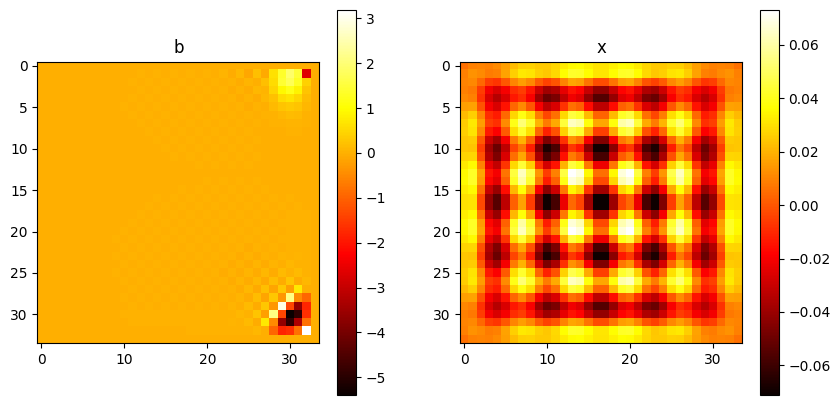

In [47]:
x = eigenvectors[:, 200].reshape(grid_size_x, grid_size_y)
# plot the result b and x side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(b, cmap="hot")
plt.colorbar()
plt.title("b")
plt.subplot(1, 2, 2)
plt.imshow(x, cmap="hot")
plt.colorbar()
plt.title("x")
plt.show()